In [1]:
import do_functions as do

In [2]:
df = do.read_and_merge('paz_metadata_actualitzat.pkl',
                       'paz_profiles_actualitzat.pkl')
df = do.clean_dataframe(df)

In [3]:
df[(df['precipBelow12'])>1.0]

,roid,lat,lon,startimeUTC,az_surf,meanP_2,precipBelow12,dphi_0010,region,height_flag_comb,...,h391,h392,h393,h394,h395,h396,h397,h398,h399,h400
11,PAZ1.2018.130.22.53.G31,-45.43,84.52,2018-05-10 22:53:45,-2.53,0.01,1.126,3.14827,1,3.15666,...,0.157860,0.157187,0.198324,0.191849,0.218879,0.199988,0.213821,0.183858,0.263429,0.265725
18,PAZ1.2018.131.02.25.G11,-51.93,-122.40,2018-05-11 02:25:02,179.89,6.62,4.647,5.35369,1,-2.00000,...,0.150336,0.143317,0.165718,0.211458,0.191923,0.141821,0.146246,0.117068,0.083446,0.068601
51,PAZ1.2018.131.18.11.G19,-53.92,-16.36,2018-05-11 18:11:57,-138.80,1.09,1.543,3.11559,1,1.90489,...,-0.038675,-0.042597,-0.017132,-0.049923,-0.033328,-0.032138,-0.001817,0.035877,0.094847,0.094332
113,PAZ1.2018.132.14.49.G18,-38.72,38.38,2018-05-12 14:49:01,-151.15,5.78,4.536,8.34740,1,2.46656,...,-0.317485,-0.254416,-0.235574,-0.179758,-0.173192,-0.197874,-0.226869,-0.247181,-0.243686,-0.184640
141,PAZ1.2018.133.02.18.G20,54.24,-148.68,2018-05-13 02:18:29,174.37,0.87,1.251,3.26647,1,1.55462,...,0.034004,0.033607,0.062363,0.044961,0.066945,0.089576,0.072305,0.042953,0.108111,0.057649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84934,PAZ1.2021.328.14.29.G10,-29.76,-137.71,2021-11-24 14:29:40,-0.44,5.07,4.789,11.81600,1,-2.00000,...,-0.322116,-0.359734,-0.367287,-0.327731,-0.237722,-0.204749,-0.178222,-0.177567,-0.132615,-0.139015
84974,PAZ1.2021.330.02.08.G09,48.83,-122.48,2021-11-26 02:08:35,161.67,3.20,2.517,5.02533,0,-2.00000,...,-0.017320,-0.024723,0.016490,0.037795,0.032121,0.025209,0.063333,0.041127,0.066412,0.048925
85044,PAZ1.2021.332.21.02.G04,12.88,146.62,2021-11-28 21:02:24,36.17,1.31,1.935,9.43562,2,2.22655,...,-0.058259,0.000442,0.035167,0.049654,0.087747,0.136961,0.156793,0.203801,0.246117,0.240627
85059,PAZ1.2021.334.01.01.G17,53.91,-128.00,2021-11-30 01:01:17,174.05,1.58,1.189,3.16920,0,-2.00000,...,0.108930,0.125111,0.062875,0.036188,-0.079552,-0.058636,-0.075807,-0.138749,-0.179857,-0.140101


## Precission-Recall curves are more informative than ROC curves when working with  imbalanced datasets 

Let's plot the ROC curve for our model. We set the truth threshold at 11.18 mm of precipitation. This means that only 11 out of the 85.088 measures will be True. 

To obtain a good ROC curve, the only thing we have to do is set a very large threshold on dphi so that we always predict no rain (False). 

This way, the false positive rate (x-axis) will be very close to "0" (remember we set dphi threshold to always predict False) and the true positive rate (y-axis) will be close to 1.

This shows an apparently skillfull model ROC curve but in fact it is just predicting False always. 

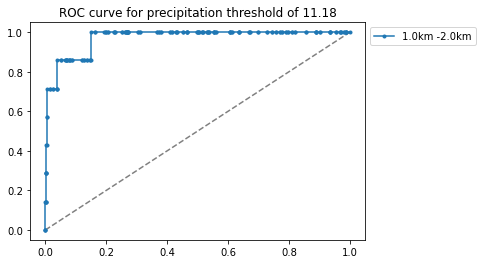

In [5]:
do.plotROC(df,1.0,2.0,0.7)

The avg_dphi h010 - h020  has NO SKILL



/Users/codefrom0/Documents/TFG/do_functions.py:182: RuntimeWarning: invalid value encountered in true_divide
  f1_scores = (2.0*precision*recall)/(precision+recall)


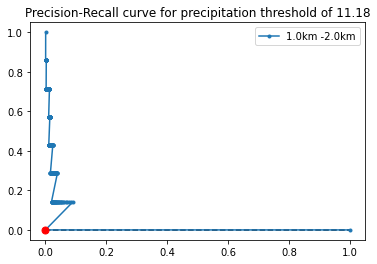

In [6]:
do.plotPrecisionRecall(df,1.0,2.0,0.7)

We can also try for less unbalanced truths. That is, setting the Truth threshold at 4.70mm for example.

This will lead to only 130 out of 85.088 True precipitations. 

The ROC plot shows an apparently really skillfull model. But in the second plot we can see that the model is penalized for predicting the majority class in all cases. 

The curves show that the model that looked good according to the ROC Curve is in fact barely skillful when evaluated by precision and recall that focus on the positive class.

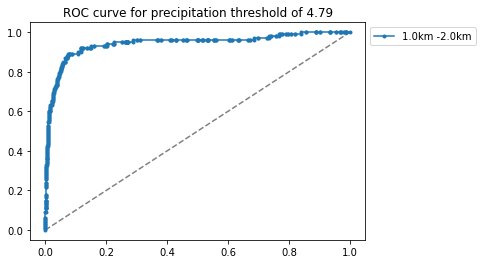

In [7]:
do.plotROC(df,1.0,2.0,0.3)

For the avg_dphi h010 - h020 :
Optimal threshold: = 11.45
F1score: 0.237



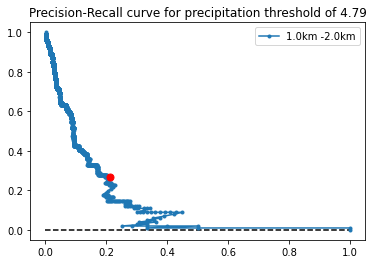

In [8]:
do.plotPrecisionRecall(df,1.0,2.0,0.3)